# Clase 4: Introducción a los datos astronómicos

En este notebook de la clase aprenderemos algunas cosas sobre el paquete [Astropy](https://www.astropy.org). Este paquete tiene un montón de aspectos sumamente útiles para la labor diaria astronómica, desde lidiar con datos, hasta cálculos cosmológicos sencillos.

Para nuestros fines, veremos:

1. Manejo de unidades y coordenadas en el cielo.
2. Hacer búsqueda de datos en "archives" disponibles. (con un sub-módulo de astropy)
3. Descarga de datos y su posterior visualización.


## Manejo de unidades

Astropy tiene un gran abanico de [constantes fundamentales](https://docs.astropy.org/en/stable/constants/index.html).

Por ejemplo:

In [ ]:
import astropy.constants as ctes
print('La velocidad de la luz es {}'.format(ctes.c))

La velocidad de la luz es 299792458.0 m / s


In [ ]:
ctes.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

Podemos hacer la conversión de unidades que queramos.

In [ ]:
ctes.c.to('km/hr')

<Quantity 1.07925285e+09 km / h>

Las constantes vienen con unidades físicas y permiten su manipulación directa.
También podemos crear nuestros propios números con unidades físicas.

In [ ]:
import astropy.units as u

distancia = 10*u.m
velocidad = 5 * u.m / u.s

distancia/velocidad

<Quantity 2. s>

Esto es particularmente útil cuando las unidades de medida son mucho más complejas. Por ejemplo, la energía de un fotón de longitud de onda $\lambda$ está dada por:

$$E_{\gamma} = h \nu = \frac{hc}{\lambda} $$


In [ ]:
# Calcularemos la energía de un fotón en el óptico con longitud de onda 500 nm (rojo)

energia = ctes.h * ctes.c / (500 * u.nm)
energia

<Quantity 3.97289171e-28 J m / nm>

In [ ]:
# Es mucho más útil ver dicha energía en electron-volts
energia.to('eV')

<Quantity 2.47968397 eV>

Es altamente recomendado utilizar este módulo para hacer cualquier cálculo que involucre lidiar con muchas unidades a la vez.

Astropy nos permite trabajar con coordenadas en el cielo también y hacer las transformaciones correspondientes a través del módulo "coordinates". Este módulo permite crear coordenadas con objeto de tipo "SkyCoord", estos objetos serán muy útiles cuando queramos buscar hacer búsqueda de objetos.

In [ ]:
# Crearemos un objeto SkyCoord de coordenadas RA = 09h21m25.738s y DEC = 18°10'17.7''

from astropy import coordinates
coords = coordinates.SkyCoord(ra='9:21:25.738',dec='18:10:17.7', unit=(u.hourangle, u.deg), frame='icrs')  # Notar las unidades!
coords  # por defecto el print de coordenadas está en grados!

<SkyCoord (ICRS): (ra, dec) in deg
    (140.35724167, 18.17158333)>

Esto fue escrito en coordenadas celestes ecuatoriales, no obstante en algunos casos nos gustaría utilizar otro  sistema de coordenadas, por ejemplo si estamos estudiando objetos dentro de la Vía Láctea, es mucho más útil trabajar con un sistema como el siguiente:

![figura](https://upload.wikimedia.org/wikipedia/commons/2/2a/Galactic_coordinates.JPG)




In [ ]:
# Podemos hacer la conversión con una línea de código con astropy.
coords.galactic # Al mirar a este objeto, ¿donde está nuestra línea de visión con respecto a la galaxia?


<SkyCoord (Galactic): (l, b) in deg
    (211.88106692, 41.06754125)>

Esto es lo básico que necesitamos de las coordenadas, pueden revisar la (documentación)[https://docs.astropy.org/en/stable/coordinates/index.html] en caso de necesitar más información.

Ahora buscaremos imágenes hechas con el telescopio espacial Hubble del objeto con las coordenadas antes mencionadas!

Para ello partimos por instalar [Astroquery](https://astroquery.readthedocs.io/en/latest/).

In [ ]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 10.3 MB/s eta 0:00:00


Para buscar las imágenes debemos utilizar el "Archive" de la ESA.

In [ ]:
from astroquery.esa.hubble import ESAHubble

esahubble = ESAHubble()

# Aquí hacemos la búsqueda por coordenadas alrededor de las coordenadas antes descritas
# El radio de búsqueda es de un mínuto de arco, buscamos solo de imágenes de HST
# calibration_level = 3 signfica que queremos datos reducidos, no "crudos".
# Async_job acelera un poco las cosas.

result = esahubble.cone_search_criteria(coordinates=coords,radius=1 * u.arcmin,
                                        obs_collection=['HST'],
                                        data_product_type = 'image',
                                        async_job = True, calibration_level=3)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
# Veamos los resultados
result.columns

<TableColumns names=('band_name','calibration_level','collection','data_product_type','dec','doi','end_time','end_time_mjd','exposure_duration','filter','fov_size','instrument_configuration','instrument_name','intent','last_modified','main_science_plane','members','members_number','observation_id','obs_type','pi_name','proposal_id','ra','release_date','start_time','start_time_mjd','stc_s','target_description','target_moving','target_name','title','wave_bandwidth','wave_central','wave_max','wave_min')>

In [ ]:
result['start_time'], result['exposure_duration'], result['filter'], result['instrument_name']

(<MaskedColumn name='start_time' dtype='object' length=10>
   2018-11-17 13:49:50.3328+00
   2018-11-17 13:49:50.3328+00
 2018-11-15 23:41:56.810976+00
 2018-11-15 23:41:56.810976+00
   2018-11-17 13:49:50.3328+00
 2018-11-15 23:41:56.810976+00
   2018-11-17 13:49:50.3328+00
     2018-11-15 23:41:56.81+00
 2018-11-16 00:51:14.827001+00
    2018-11-17 13:49:50.333+00,
 <MaskedColumn name='exposure_duration' dtype='float64' length=10>
      2476.0
      2476.0
 2611.750976
 2611.750976
      2476.0
 2611.750976
      1857.0
      2612.0
  102.934334
      2476.0,
 <MaskedColumn name='filter' dtype='object' length=10>
     F438W
 detection
     F160W
 detection
     F438W
     F160W
     F438W
     F160W
     F153M
     F438W,
 <MaskedColumn name='instrument_name' dtype='str64' length=10>
 WFC3/UVIS
 WFC3/UVIS
   WFC3/IR
   WFC3/IR
 WFC3/UVIS
   WFC3/IR
 WFC3/UVIS
   WFC3/IR
   WFC3/IR
 WFC3/UVIS)

Utilizaremos algunas observaciones en el infrarrojo del [filtro F160W](http://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=HST&gname2=WFC3_IR&asttype=) del instrumento [WFC3](https://www.stsci.edu/hst/instrumentation/wfc3).

In [ ]:
# Extraemos el "observing_id" necesario para descargar los datos
id = result[2]['observation_id']

In [ ]:
esahubble.download_product(observation_id = id, filename='gravitational_arc.fits')

'gravitational_arc.fits.zip'

In [ ]:
!unzip /content/gravitational_arc.fits.zip

Archive:  /content/gravitational_arc.fits.zip
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_drz.fits.gz  
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_drz.jpg  
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_drz_thumb.jpg  
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_point-cat.ecsv  
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_segment-cat.ecsv  
  inflating: hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_trl.txt  


In [ ]:
import astropy.io.fits as F
# Ahora finalmente cargamos con astropy
imagen = F.open('/content/hst_152/3-PRODUCT/hst_15253_04_wfc3_ir_f160w_idki04_drz.fits.gz')

In [ ]:
# Siempre revisen las primeras líneas del header de cada índice!
imagen[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2024-01-11'         / date this file was written (yyyy-mm-dd)        
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    4 / Number of standard extensions                  
FILENAME= 'hst_15253_04_wfc3_ir_f160w_idki04_drz.fits' / name of file           
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

Al leer el header nos damos cuenta que el primer índice solo contiene "metadata" de las observaciones, nada de datos.

In [ ]:
imagen[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1362                                                  
NAXIS2  =                 1290                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'idki04j6q                         ' / rootname of the observation set
EXPNAME = 'idki04j6q                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     

In [ ]:
# Finalmente extraemos los datos
data = imagen[1].data

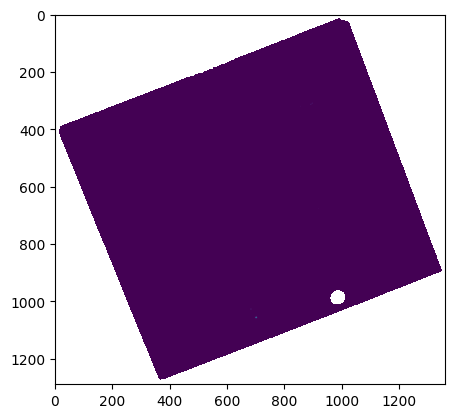

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data)

¿Qué pasó? No se ve nada, esto pasa casi siempre y la solución usual es ajustar correctamente la escala.

Una forma astuta es utilizando un histograma de los datos.

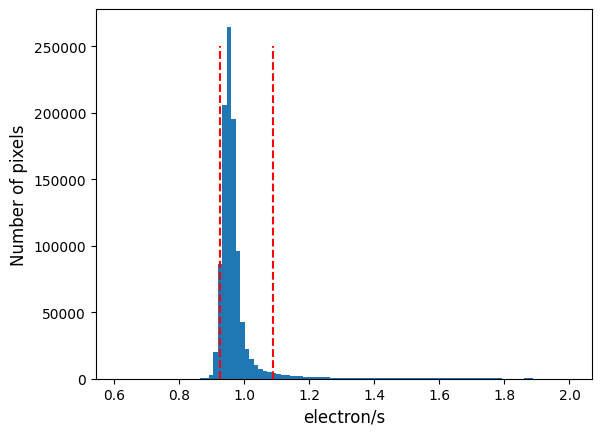

In [ ]:
import numpy as np                           # utilizaremos su función de cálculo de percentiles

plt.hist(data[data < 2].flatten(), bins=100)

# Esta es una forma de generar percentiles "simétricos" no tiene porque ser siempre así.
value = 5
percentiles = np.nanpercentile(data.flatten(), [value, 100-value ])

plt.vlines([percentiles], [0]*2, [250000]*2, linestyle='--', color='red')
plt.xlabel('electron/s', fontsize=12)
plt.ylabel('Number of pixels', fontsize=12)
plt.show()

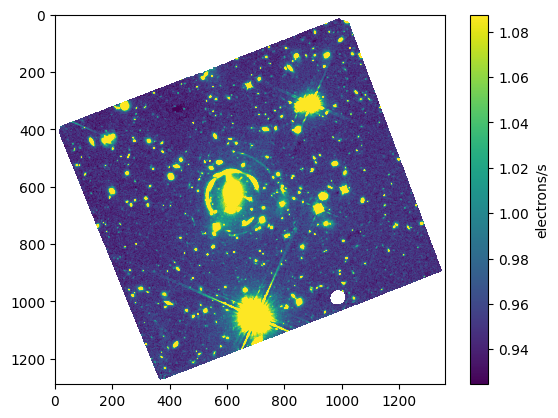

In [ ]:
value = 5
percentiles = np.nanpercentile(data.flatten(), [value, 100-value ])

plt.imshow(data)
plt.clim(percentiles[0], percentiles[1])   # utilizamos los nuevos límites
plt.colorbar(label='electrons/s')          # Añadimos una colorbar
plt.show()

Nos enfocaremos en la parte central que se ve interesante. Para ello haremos un "zoom" recortando la parte que no queramos observar. Aprovecharemos de cambiar la escala de colores que estamos utilizando, podemos tomar alguna de la [lista de matplotlib,](https://matplotlib.org/stable/users/explain/colors/colormaps.html) finalmente agrandaremos un poco la figura.

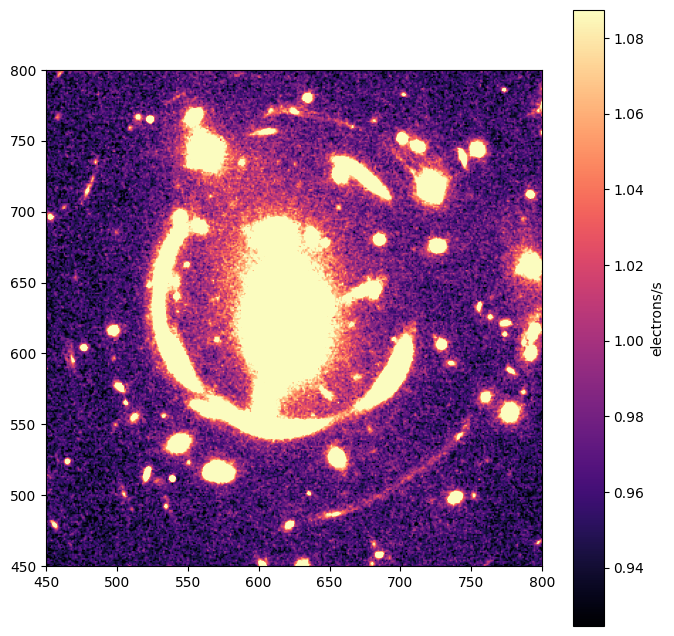

In [ ]:
value = 5
percentiles = np.nanpercentile(data.flatten(), [value, 100-value ])
plt.figure(figsize=(8,8))                  # la hacemos un poco más grande

plt.imshow(data, cmap='magma')
plt.clim(percentiles[0], percentiles[1])   # utilizamos los nuevos límites
plt.colorbar(label='electrons/s')          # Añadimos una colorbar

plt.xlim(450,800) # Recorte en el eje x
plt.ylim(450,800) # Recorte en el eje y

plt.show()

Para ver un poco más en detalle aquellas zonas "saturadas", podemos ampliar el rango de nuestros percentiles hasta estar satisfechos.

Hay una última cosa que podemos hacer, agregar coordenadas a la imagen.

Esto se puede hacer con el World Coordinate System (WCS) con el cual podemos lidiar utilizando Astropy. El WCS describe las transformaciones geométricas para ir desde las coordenadas pixel hacia las coordenadas en el cielo.


In [ ]:
from astropy.wcs import WCS

WCS_image = WCS(imagen[1].header)

# Podemos hacer la conversión pixel-coordenada, coordenada-pixel

coordenada_nueva = WCS_image.pixel_to_world(650, 650)
coordenada_nueva, WCS_image.world_to_pixel(coordenada_nueva)

(<SkyCoord (ICRS): (ra, dec) in deg
     (140.35608661, 18.17229671)>,
 (array(650.), array(650.)))

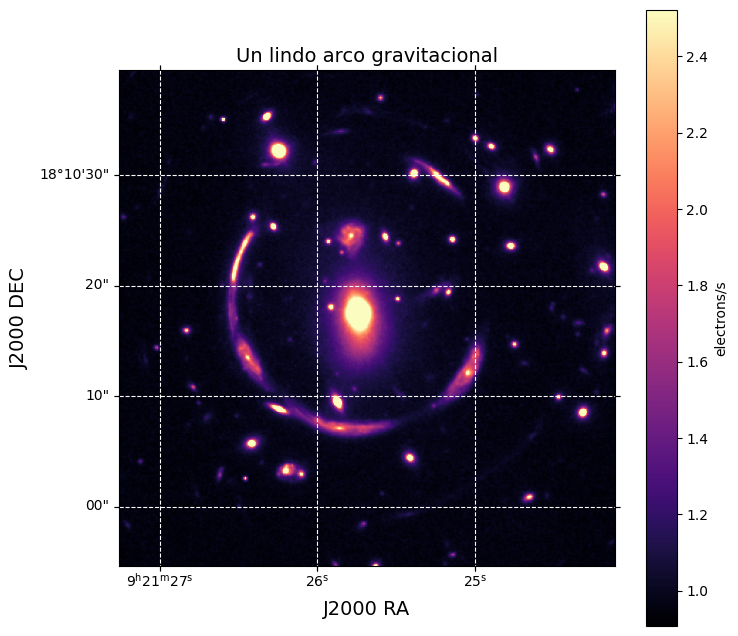

In [ ]:
value = 0.6
percentiles = np.nanpercentile(data.flatten(), [value, 100-value ])
plt.figure(figsize=(8,8))                  # la hacemos un poco más grande

plt.subplot(projection=WCS_image)          # Projectamos las coordenadas con el WCS
plt.imshow(data, cmap='magma')
plt.clim(percentiles[0], percentiles[1])   # utilizamos los nuevos límites
plt.colorbar(label='electrons/s')          # Añadimos una colorbar

plt.xlim(450,800) # Recorte en el eje x
plt.ylim(450,800) # Recorte en el eje y

plt.xlabel('J2000 RA', fontsize=14)
plt.ylabel('J2000 DEC', fontsize=14)
plt.title('Un lindo arco gravitacional', fontsize=14)

plt.grid(color='white', ls='--')        # Pueden añadir la grilla si quieren
plt.show()


# Esta es la era del data science: los science archives!

Muchas colaboraciones científicas están adoptando la creación de Science Archives en donde almacenan todos los datos en una recopilación histórica.

Varios de estos tienen páginas web bastante amigables para la búsqueda de datos.

Algunos ejemplos relevantes:
- [ALMA](https://almascience.nrao.edu/aq/)
- [ESO](https://archive.eso.org/scienceportal/home)
- [GAIA](https://gea.esac.esa.int/archive/)
- [GEMINI](https://archive.gemini.edu/searchform)
- [SDSS](https://cas.sdss.org/dr18/)

Astroquery tiene ya implementadas búsquedas automáticas para cada uno de estos.